In [44]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots
from pandas import DataFrame, read_csv

In [45]:
all_write_data: DataFrame = read_csv('data/all_write.csv')
all_write_data_1k: DataFrame = all_write_data[all_write_data['data_size'] == 1000]
all_write_data_1k

,system,server_count,data_size,read_ratio,num_clients,num_dbs,wal_file_count,ops,med,p95,p99
0,etcd,3,1000,0.0,33,NaN,NaN,6474,10439,33738,48209
3,etcdl,3,1000,0.0,33,1.0,1.0,53045,1663,2211,2474
6,etcdl,3,1000,0.0,33,1.0,5.0,45814,1946,2588,2841
9,etcdl,3,1000,0.0,33,1.0,10.0,40853,2190,2882,3153
12,etcdl,3,1000,0.0,33,3.0,1.0,49659,1783,2380,2640
15,etcdl,3,1000,0.0,33,3.0,5.0,43313,2063,2724,3000
18,etcdl,3,1000,0.0,33,3.0,10.0,38665,2309,3040,3320
21,etcdl,3,1000,0.0,33,5.0,1.0,46713,1910,2521,2780
24,etcdl,3,1000,0.0,33,5.0,5.0,41224,2168,2856,3152
27,etcdl,3,1000,0.0,33,5.0,10.0,37267,2401,3164,3475


['etcd', 'etcd-light(1, 1)', 'etcd-light(5, 1)', 'etcd-light(10, 1)', 'etcd-light(1, 3)', 'etcd-light(5, 3)', 'etcd-light(10, 3)', 'etcd-light(1, 5)', 'etcd-light(5, 5)', 'etcd-light(10, 5)']
[51.792, 424.36, 366.512, 326.824, 397.272, 346.504, 309.32, 373.704, 329.792, 298.136]


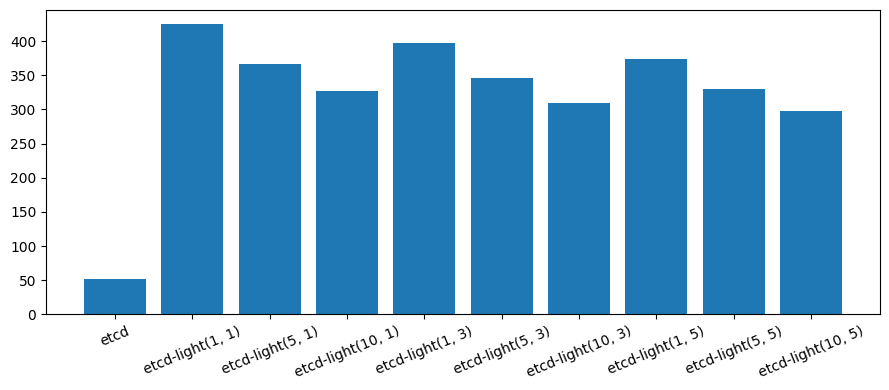

In [46]:
fig: Figure
ax: Axes
fig, ax = subplots(figsize=(9, 4))

labels: list[str] = []
vals: list[float] = []
for i, row in all_write_data_1k.iterrows():
  match row['system']:
    case 'etcd':
      labels.append('etcd')
    case 'etcdl':
      labels.append(f'etcd-light({int(row["wal_file_count"])}, {int(row["num_dbs"])})')
  
  vals.append((1000 * row['ops'] * 8) / (1000000))

print(labels)
print(vals)

ax.bar(labels, vals, color='C0')
ax.tick_params(axis='x', labelrotation=22.5)
fig.tight_layout()

fig.savefig('plots/all_write_throughput.png')
fig.savefig('plots/all_write_throughput.pdf')